In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from sklearn.decomposition import PCA

In [56]:
dfg = pd.read_csv('wat-r7-good.csv')
dfm = pd.read_csv('wat-r7-mals.csv')

In [57]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,23,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,22,26,3,3,1
1,31,4,0,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,21,26,2,3,1
2,86,0,3,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,8,26,1,3,1
3,364,0,3,0xeadc0,0,0,3,2,8,0,0,23,7,344,3,4,23,1,1,1
4,372,4,0,0xeadc0,1,0,3,2,9,23,7,18,2,368,3,3,23,1,1,1


In [58]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,23,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,51,59,3,3,0
1,31,4,0,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,48,59,2,3,0
2,86,0,3,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,14,59,1,3,0
3,364,0,3,0xeadc0,0,0,3,2,8,0,0,23,7,344,7,9,40,1,1,0
4,372,4,0,0xeadc0,1,0,3,2,9,23,7,18,2,368,7,8,40,1,1,0


In [59]:
df = dfg.append(dfm, ignore_index=True)

In [60]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,23,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,22,26,3,3,1
1,31,4,0,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,21,26,2,3,1
2,86,0,3,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,8,26,1,3,1
3,364,0,3,0xeadc0,0,0,3,2,8,0,0,23,7,344,3,4,23,1,1,1
4,372,4,0,0xeadc0,1,0,3,2,9,23,7,18,2,368,3,3,23,1,1,1


In [61]:
df = df.sort_values('time')

In [62]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,23,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,22,26,3,3,1
8172,23,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,51,59,3,3,0
8173,31,4,0,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,48,59,2,3,0
1,31,4,0,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,21,26,2,3,1
8174,86,0,3,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,14,59,1,3,0
2,86,0,3,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,8,26,1,3,1
3,364,0,3,0xeadc0,0,0,3,2,8,0,0,23,7,344,3,4,23,1,1,1
8175,364,0,3,0xeadc0,0,0,3,2,8,0,0,23,7,344,7,9,40,1,1,0
4,372,4,0,0xeadc0,1,0,3,2,9,23,7,18,2,368,3,3,23,1,1,1
8176,372,4,0,0xeadc0,1,0,3,2,9,23,7,18,2,368,7,8,40,1,1,0


In [63]:
df.to_csv('wat-r7-pkt.csv',index=False)

In [64]:
df = pd.read_csv("wat-r7-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,23,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,22,26,3,3,1
1,23,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,51,59,3,3,0
2,31,4,0,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,48,59,2,3,0
3,31,4,0,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,21,26,2,3,1
4,86,0,3,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,14,59,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16175,3251388,1,3,0x1152c0,4,1,1,2,8,0,0,27,11,3251361,10026,12,26,1,1,1
16176,3251395,1,3,0x1152c0,4,2,1,2,8,0,0,27,11,3251361,10026,5,26,1,1,1
16177,3251402,1,3,0x1152c0,4,3,1,2,8,0,0,27,11,3251361,10026,41,42,1,1,1
16178,3251409,1,3,0x1152c0,4,4,2,2,8,0,0,27,11,3251361,10026,36,42,1,1,1


In [65]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.001932,0.008531,0.039102,0.025232,-0.037171,NaN,-0.001240,-0.018577,-0.019802,0.002157,0.003257,1.000000,0.982497,-0.025987,-0.011418,-0.150903,-0.180002,0.077765
outport,-0.001932,1.000000,-0.963617,0.357069,-0.022047,0.032491,NaN,0.646859,0.877230,0.944460,-0.631420,-0.651046,-0.001926,-0.004586,-0.034121,0.035895,0.020814,0.064572,-0.003477
inport,0.008531,-0.963617,1.000000,-0.356886,0.041769,-0.061555,NaN,-0.668028,-0.940285,-0.991158,0.759405,0.815271,0.008524,0.013577,0.069948,0.010402,-0.034626,-0.075286,0.007086
packet_type,0.039102,0.357069,-0.356886,1.000000,0.421782,-0.621585,NaN,-0.017935,0.282225,0.332434,-0.345049,-0.279911,0.039108,0.040709,0.079759,-0.022354,0.016665,0.018325,0.006329
flit_id,0.025232,-0.022047,0.041769,0.421782,1.000000,-0.082194,NaN,-0.163361,-0.112548,-0.069402,0.153839,0.082562,0.025225,0.027708,-0.008404,0.081977,0.016132,0.005678,0.005817
flit_type,-0.037171,0.032491,-0.061555,-0.621585,-0.082194,1.000000,NaN,0.240747,0.165863,0.102278,-0.226714,-0.121673,-0.037175,-0.040834,-0.190342,0.036795,-0.012189,0.019742,-0.008573
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.001240,0.646859,-0.668028,-0.017935,-0.163361,0.240747,NaN,1.000000,0.615726,0.657512,-0.505151,-0.539280,-0.001237,-0.004102,-0.069020,0.009968,0.038448,0.066976,-0.003153
src_ni,-0.018577,0.877230,-0.940285,0.282225,-0.112548,0.165863,NaN,0.615726,1.000000,0.975405,-0.754450,-0.820749,-0.018570,-0.024601,-0.116266,-0.044993,0.030804,0.072717,-0.010655
src_router,-0.019802,0.944460,-0.991158,0.332434,-0.069402,0.102278,NaN,0.657512,0.975405,1.000000,-0.767217,-0.827541,-0.019795,-0.025154,-0.083528,-0.015266,0.040285,0.080623,-0.013251


In [66]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [67]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,0,3,0,0,3,2,8,23,7,3,0,3,3
1,0,3,0,0,3,2,8,23,7,3,0,3,3
2,4,0,1,0,3,2,8,18,2,27,0,2,3
3,4,0,1,0,3,2,8,18,2,27,0,2,3
4,0,3,2,0,3,2,8,23,7,74,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16175,1,3,4,1,1,2,8,27,11,3251361,10026,1,1
16176,1,3,4,2,1,2,8,27,11,3251361,10026,1,1
16177,1,3,4,3,1,2,8,27,11,3251361,10026,1,1
16178,1,3,4,4,2,2,8,27,11,3251361,10026,1,1


In [68]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000000,0.181818,0.181818
1,0.00,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000000,0.181818,0.181818
2,1.00,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.580645,0.133333,0.000007,0.000000,0.090909,0.181818
3,1.00,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.580645,0.133333,0.000007,0.000000,0.090909,0.181818
4,0.00,1.0,0.333333,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000022,0.000000,0.000000,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16175,0.25,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.000000,0.000000
16176,0.25,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.000000,0.000000
16177,0.25,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.000000,0.000000
16178,0.25,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.000000,0.000000


In [69]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.963617,0.357069,-0.022047,0.032491,NaN,0.646859,-0.631420,-0.651046,-0.001926,-0.004586,0.020814,0.064572,-0.003477
1,-0.963617,1.000000,-0.356886,0.041769,-0.061555,NaN,-0.668028,0.759405,0.815271,0.008524,0.013577,-0.034626,-0.075286,0.007086
2,0.357069,-0.356886,1.000000,0.421782,-0.621585,NaN,-0.017935,-0.345049,-0.279911,0.039108,0.040709,0.016665,0.018325,0.006329
3,-0.022047,0.041769,0.421782,1.000000,-0.082194,NaN,-0.163361,0.153839,0.082562,0.025225,0.027708,0.016132,0.005678,0.005817
4,0.032491,-0.061555,-0.621585,-0.082194,1.000000,NaN,0.240747,-0.226714,-0.121673,-0.037175,-0.040834,-0.012189,0.019742,-0.008573
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.646859,-0.668028,-0.017935,-0.163361,0.240747,NaN,1.000000,-0.505151,-0.539280,-0.001237,-0.004102,0.038448,0.066976,-0.003153
7,-0.631420,0.759405,-0.345049,0.153839,-0.226714,NaN,-0.505151,1.000000,0.900730,0.002151,0.008490,-0.029074,-0.066210,0.009491
8,-0.651046,0.815271,-0.279911,0.082562,-0.121673,NaN,-0.539280,0.900730,1.000000,0.003250,0.010881,-0.047853,-0.073401,0.011687
9,-0.001926,0.008524,0.039108,0.025225,-0.037175,NaN,-0.001237,0.002151,0.003250,1.000000,0.982497,-0.150903,-0.180002,0.077764


In [70]:
train_Y = df['target']

In [71]:
train_Y

0        1
1        0
2        0
3        1
4        0
        ..
16175    1
16176    1
16177    1
16178    1
16179    1
Name: target, Length: 16180, dtype: int64

In [72]:
pca = PCA(0.95)

In [73]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.40939249,  1.12084345,  0.16765183, -0.13613514,  0.28879704,
         0.05843301],
       [-0.40939249,  1.12084345,  0.16765183, -0.13613514,  0.28879704,
         0.05843301],
       [ 0.93223769,  1.00474078,  0.02997786, -0.0944951 ,  0.08991128,
         0.58595397],
       ...,
       [-0.40002806, -0.72960037,  0.09566309, -0.1514826 , -0.03065513,
         0.0015456 ],
       [-0.39396344, -0.70877076,  0.10848228, -0.5546911 , -0.00527916,
         0.04961698],
       [-0.3285429 ,  0.04164454,  1.06482252, -0.17938148, -0.17591904,
        -0.02510626]])

In [75]:
pca.explained_variance_ratio_

array([0.43725971, 0.1801371 , 0.16485649, 0.10715551, 0.05139991,
       0.0316587 ])

In [76]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

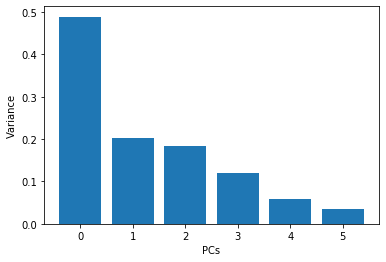

In [77]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [78]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,-0.409392,1.120843,0.167652,-0.136135,0.288797,0.058433
1,-0.409392,1.120843,0.167652,-0.136135,0.288797,0.058433
2,0.932238,1.004741,0.029978,-0.094495,0.089911,0.585954
3,0.932238,1.004741,0.029978,-0.094495,0.089911,0.585954
4,-0.364710,1.009806,0.036913,-0.083953,0.350428,0.059627
...,...,...,...,...,...,...
16175,-0.380887,-0.539152,0.345949,0.211352,-0.006061,0.060335
16176,-0.390457,-0.634376,0.220806,0.029935,-0.018358,0.030940
16177,-0.400028,-0.729600,0.095663,-0.151483,-0.030655,0.001546
16178,-0.393963,-0.708771,0.108482,-0.554691,-0.005279,0.049617


In [79]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,-0.409392,1.120843,0.167652,-0.136135,0.288797,0.058433,1
1,-0.409392,1.120843,0.167652,-0.136135,0.288797,0.058433,0
2,0.932238,1.004741,0.029978,-0.094495,0.089911,0.585954,0
3,0.932238,1.004741,0.029978,-0.094495,0.089911,0.585954,1
4,-0.364710,1.009806,0.036913,-0.083953,0.350428,0.059627,0
...,...,...,...,...,...,...,...
16175,-0.380887,-0.539152,0.345949,0.211352,-0.006061,0.060335,1
16176,-0.390457,-0.634376,0.220806,0.029935,-0.018358,0.030940,1
16177,-0.400028,-0.729600,0.095663,-0.151483,-0.030655,0.001546,1
16178,-0.393963,-0.708771,0.108482,-0.554691,-0.005279,0.049617,1


In [80]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,-1.060742e-15,-1.310284e-15,7.472463e-17,2.930470e-15,2.030590e-14,-0.007326
1,-1.060742e-15,1.000000e+00,-2.073815e-15,-1.214040e-15,1.693594e-15,-1.761770e-15,-0.029503
2,-1.310284e-15,-2.073815e-15,1.000000e+00,-1.603391e-15,1.479534e-15,-1.321179e-15,0.012823
3,7.472463e-17,-1.214040e-15,-1.603391e-15,1.000000e+00,-1.060339e-14,1.726371e-15,0.001353
4,2.930470e-15,1.693594e-15,1.479534e-15,-1.060339e-14,1.000000e+00,-3.047445e-15,-0.008852
5,2.030590e-14,-1.761770e-15,-1.321179e-15,1.726371e-15,-3.047445e-15,1.000000e+00,-0.000053
target,-7.325504e-03,-2.950283e-02,1.282306e-02,1.353472e-03,-8.851588e-03,-5.316513e-05,1.000000


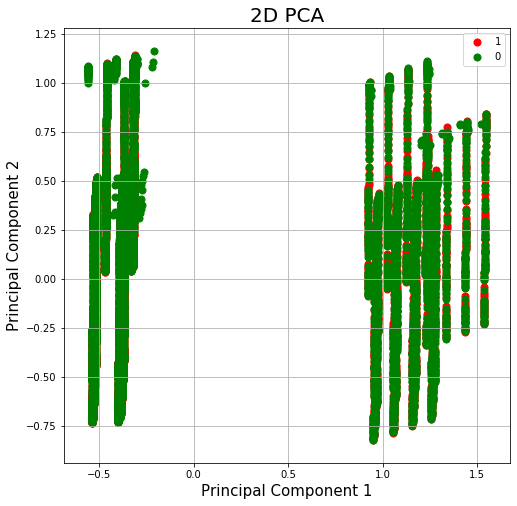

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [82]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,0,3,0,0,3,2,8,0,0,23,7,3,0,22,26,3,3,1
1,0,3,0,0,3,2,8,0,0,23,7,3,0,51,59,3,3,0
2,4,0,1,0,3,2,8,23,7,18,2,27,0,48,59,2,3,0
3,4,0,1,0,3,2,8,23,7,18,2,27,0,21,26,2,3,1
4,0,3,2,0,3,2,8,18,2,23,7,74,0,14,59,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16175,1,3,4,1,1,2,8,0,0,27,11,3251361,10026,12,26,1,1,1
16176,1,3,4,2,1,2,8,0,0,27,11,3251361,10026,5,26,1,1,1
16177,1,3,4,3,1,2,8,0,0,27,11,3251361,10026,41,42,1,1,1
16178,1,3,4,4,2,2,8,0,0,27,11,3251361,10026,36,42,1,1,1


In [83]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [84]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [85]:
seed = 7
np.random.seed(seed)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [96]:
model = Sequential()

In [97]:
n_cols = train_X.shape[1]
n_cols

13

In [98]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [99]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [100]:
model.fit(x_train, y_train, epochs=200, validation_split=0.4)

Train on 6601 samples, validate on 4401 samples
Epoch 1/200
6601/6601 [==============================] - 1s 184us/step - loss: 0.2497 - accuracy: 0.5178 - val_loss: 0.2501 - val_accuracy: 0.5156
Epoch 2/200
6601/6601 [==============================] - 1s 97us/step - loss: 0.2496 - accuracy: 0.5219 - val_loss: 0.2502 - val_accuracy: 0.5178
Epoch 3/200
6601/6601 [==============================] - 1s 94us/step - loss: 0.2496 - accuracy: 0.5210 - val_loss: 0.2502 - val_accuracy: 0.5194
Epoch 4/200
6601/6601 [==============================] - 1s 99us/step - loss: 0.2495 - accuracy: 0.5226 - val_loss: 0.2501 - val_accuracy: 0.5144
Epoch 5/200
6601/6601 [==============================] - 1s 93us/step - loss: 0.2494 - accuracy: 0.5207 - val_loss: 0.2500 - val_accuracy: 0.5147
Epoch 6/200
6601/6601 [==============================] - 1s 93us/step - loss: 0.2494 - accuracy: 0.5252 - val_loss: 0.2499 - val_accuracy: 0.5147
Epoch 7/200
6601/6601 [==============================] - 1s 121us/step - lo

In [103]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [104]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.76%


In [105]:
dff = pd.read_csv('wat-r7-pkt.csv',nrows=500)

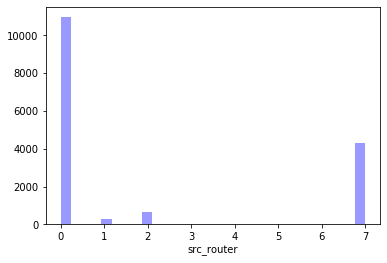

In [106]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

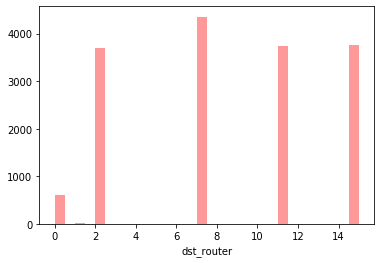

In [107]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

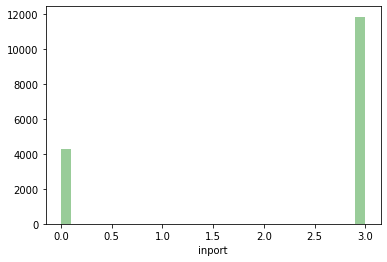

In [108]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

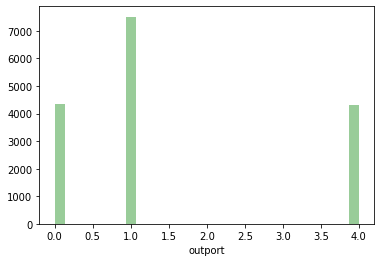

In [109]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

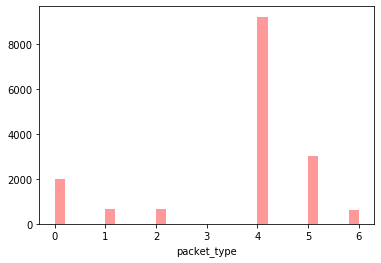

In [110]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')